In [61]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [62]:
df = pd.read_csv(r"/home/vijay/Desktop/4.csv")
df

,current_density,cell_voltage,power_density,pressure,relative_humidity
0,36.7,0.971,35.7,5,30
1,74.0,0.918,67.9,5,30
2,85.5,0.867,74.1,5,30
3,164.0,0.823,135.0,5,30
4,372.0,0.770,286.0,5,30
...,...,...,...,...,...
138,709.0,0.455,322.0,25,100
139,733.0,0.402,295.0,25,100
140,750.0,0.363,272.0,25,100
141,772.0,0.297,230.0,25,100


In [63]:
X = df.drop(["cell_voltage"], axis=1)
X

,current_density,power_density,pressure,relative_humidity
0,36.7,35.7,5,30
1,74.0,67.9,5,30
2,85.5,74.1,5,30
3,164.0,135.0,5,30
4,372.0,286.0,5,30
...,...,...,...,...
138,709.0,322.0,25,100
139,733.0,295.0,25,100
140,750.0,272.0,25,100
141,772.0,230.0,25,100


In [64]:
y = df.drop(["current_density","power_density","pressure","relative_humidity"], axis=1)
y

,cell_voltage
0,0.971
1,0.918
2,0.867
3,0.823
4,0.770
...,...
138,0.455
139,0.402
140,0.363
141,0.297


In [65]:
print(X.shape)
print(y.shape)

(143, 4)
(143, 1)


In [66]:
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

In [67]:
y = y.values.reshape(-1,1)
y

array([[0.971],
       [0.918],
       [0.867],
       [0.823],
       [0.77 ],
       [0.72 ],
       [0.67 ],
       [0.619],
       [0.57 ],
       [0.52 ],
       [0.47 ],
       [0.419],
       [0.369],
       [0.32 ],
       [0.27 ],
       [0.247],
       [0.297],
       [0.348],
       [0.397],
       [0.447],
       [0.497],
       [0.547],
       [0.597],
       [0.647],
       [0.697],
       [0.747],
       [0.797],
       [0.843],
       [0.897],
       [0.94 ],
       [0.974],
       [0.309],
       [0.351],
       [0.4  ],
       [0.45 ],
       [0.5  ],
       [0.551],
       [0.6  ],
       [0.65 ],
       [0.7  ],
       [0.751],
       [0.8  ],
       [0.85 ],
       [0.9  ],
       [0.944],
       [0.981],
       [0.992],
       [0.946],
       [0.894],
       [0.849],
       [0.795],
       [0.745],
       [0.695],
       [0.645],
       [0.595],
       [0.545],
       [0.494],
       [0.444],
       [0.394],
       [0.344],
       [0.294],
       [0.244],
       [

In [68]:
y_scaled = scalar.fit_transform(y)
y_scaled

array([[0.92661692],
       [0.86069652],
       [0.79726368],
       [0.74253731],
       [0.67661692],
       [0.61442786],
       [0.55223881],
       [0.48880597],
       [0.4278607 ],
       [0.36567164],
       [0.30348259],
       [0.24004975],
       [0.1778607 ],
       [0.11691542],
       [0.05472637],
       [0.0261194 ],
       [0.08830846],
       [0.15174129],
       [0.21268657],
       [0.27487562],
       [0.33706468],
       [0.39925373],
       [0.46144279],
       [0.52363184],
       [0.5858209 ],
       [0.64800995],
       [0.710199  ],
       [0.76741294],
       [0.83457711],
       [0.8880597 ],
       [0.93034826],
       [0.10323383],
       [0.15547264],
       [0.21641791],
       [0.27860697],
       [0.34079602],
       [0.40422886],
       [0.46517413],
       [0.52736318],
       [0.58955224],
       [0.65298507],
       [0.71393035],
       [0.7761194 ],
       [0.83830846],
       [0.89303483],
       [0.93905473],
       [0.95273632],
       [0.895

In [69]:
print(X_scaled.shape,y_scaled.shape)

(143, 4) (143, 1)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [71]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=4, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 25)                125       
                                                                 
 dense_16 (Dense)            (None, 25)                650       
                                                                 
 dense_17 (Dense)            (None, 25)                650       
                                                                 
 dense_18 (Dense)            (None, 25)                650       
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2101 (8.21 KB)
Trainable params: 2101 (8.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [73]:
epochs_hist = model.fit(X_train, y_train, epochs=300, batch_size=25,  verbose=1, validation_split=0.2)


Epoch 1/300
4/4 [==============================] - 1s 56ms/step - loss: 0.4011 - val_loss: 0.3631
Epoch 2/300
4/4 [==============================] - 0s 16ms/step - loss: 0.3535 - val_loss: 0.3143
Epoch 3/300
4/4 [==============================] - 0s 21ms/step - loss: 0.3138 - val_loss: 0.2788
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 0.2818 - val_loss: 0.2497
Epoch 5/300
4/4 [==============================] - 0s 16ms/step - loss: 0.2548 - val_loss: 0.2218
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 0.2269 - val_loss: 0.1951
Epoch 7/300
4/4 [==============================] - 0s 12ms/step - loss: 0.2012 - val_loss: 0.1709
Epoch 8/300
4/4 [==============================] - 0s 14ms/step - loss: 0.1751 - val_loss: 0.1508
Epoch 9/300
4/4 [==============================] - 0s 18ms/step - loss: 0.1555 - val_loss: 0.1352
Epoch 10/300
4/4 [==============================] - 0s 14ms/step - loss: 0.1373 - val_loss: 0.1246
Epoch 11/300
4/4 [=

4/4 [==============================] - 0s 24ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 177/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 178/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 179/300
4/4 [==============================] - 0s 28ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 180/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0017 - val_loss: 0.0063
Epoch 181/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 182/300
4/4 [==============================] - 0s 22ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 183/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0016 - val_loss: 0.0058
Epoch 184/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 185/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 186/300


In [74]:
print(epochs_hist.history.keys())


dict_keys(['loss', 'val_loss'])


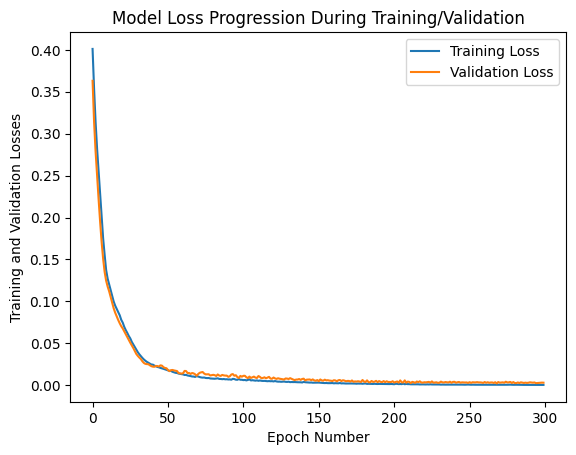

In [75]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
